PSNR Value: 29.66711930553754 dB


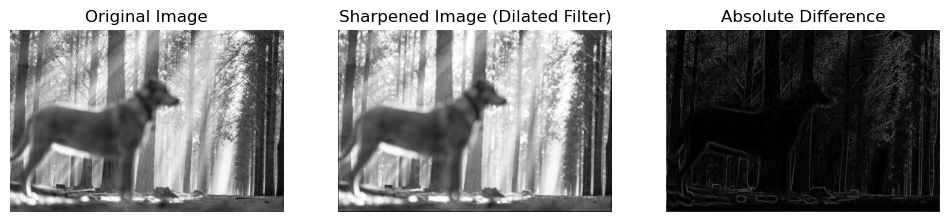

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def dilate_image(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_height, pad_width = k_height // 2, k_width // 2

    dilated_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(pad_height, height - pad_height):
        for j in range(pad_width, width - pad_width):
            region = image[i - pad_height : i + pad_height + 1, j - pad_width : j + pad_width + 1]
            dilated_image[i, j] = np.max(region * kernel)

    return dilated_image

def calculate_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load a grayscale image
image = Image.open(r"C:\Users\KAUSHAL KISHOR\Desktop\signal lab\blur 3.jpg").convert("L")
image = np.array(image)

# Define a dilated filter (structuring element)
dilated_kernel = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]], dtype=np.uint8)

# Perform dilation on the image using the dilated kernel
sharpened_image = dilate_image(image, dilated_kernel)

# Calculate PSNR
psnr_value = calculate_psnr(image, sharpened_image)

# Display PSNR value
print(f"PSNR Value: {psnr_value} dB")

# Rest of the code for displaying images
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Dilated Filter)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(image.astype(int) - sharpened_image.astype(int)).astype(np.uint8), cmap='gray')
plt.title('Absolute Difference')
plt.axis('off')

plt.show()
